### Importation of Libraries

In [1]:
import numpy as np
import datetime as dt
import serial
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sys

### Serial Data Retrieval and Processing

In [26]:


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# make sure the 'COM#' is set according the Windows Device Manager
ser = serial.Serial('COM9', 115200, timeout=1)
time.sleep(2)
print("connected to: " + ser.portstr)

def collect_data(ser):
    time.sleep(.001)                    # delay of 1ms
    val = ser.readline()                # read complete line from serial output
    while not '\\n'in str(val):         # check if full data is received. 
        # This loop is entered only if serial read value doesn't contain \n
        # which indicates end of a sentence. 
        # str(val) - val is byte where string operation to check `\\n` 
        # can't be performed
        time.sleep(.001)                # delay of 1ms 
        temp = ser.readline()           # check for serial output.
        if not not temp.decode():       # if temp is not empty.
            val = (val.decode()+temp.decode()).encode()
            # requrired to decode, sum, then encode because
            # long values might require multiple passes
    val = val.decode()                  # decoding from bytes
    val = val.strip()                   # stripping leading and trailing spaces.
    return val



connected to: COM9


### Serial Data Plotting

In [ ]:
while True:
    #print(collect_data(ser)[:-1])
    print(dt.datetime.now().strftime('%H:%M:%S'))

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(frame_num):
    x = np.append(x, dt.datetime.now().strftime('%H:%M:%S'))[frame_num]
    y = np.append(y, float(collect_data(ser)))[frame_num]
    line.set_data((x, y))
 
    return line

anim = FuncAnimation(fig, animate, frames=200, interval=50)
plt.show()

<IPython.core.display.Javascript object>

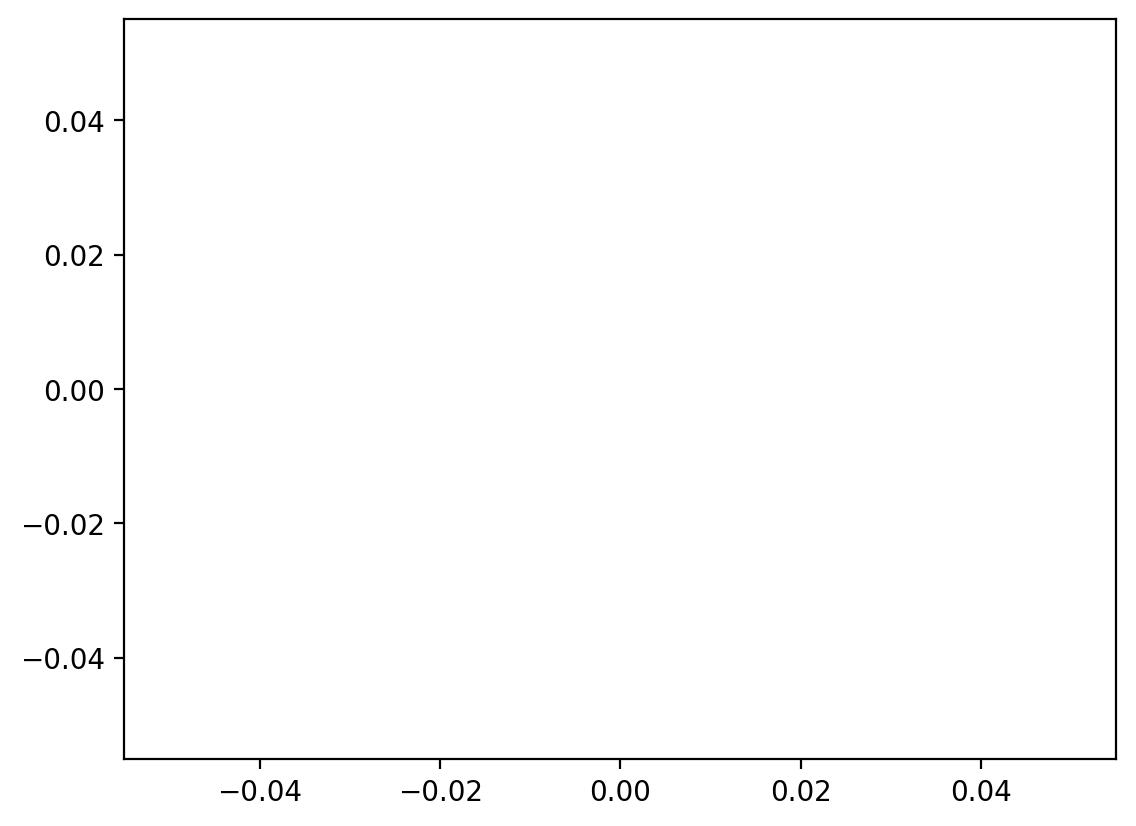

In [30]:
fig, ax = plt.subplots()
line, = ax.plot([])

# x = np.linspace(0, 100, 1)
# y = np.empty(1, dtype=float)
# plt.plot(x, y)
# plt.show()
x = np.linspace(0, 100, 1)
y = np.empty(1, dtype=float)

def animate(frame_num):
    x = np.append(x, dt.datetime.now().strftime('%H:%M:%S'))
    y = np.append(y, float(collect_data(ser)))
    line.set_data((x, y))
    return line

# Limit x and y lists to 20 items
x = x[-20:]
y = y[-20:]
anim = FuncAnimation(fig, animate, frames=100, interval=5)
plt.show()

# while True:
#     y = np.append(y, float(collect_data(ser)))
#     x = np.append(x, dt.datetime.now().strftime('%H:%M:%S'))
#     plt.plot(x,y)
#     plt.show()